## Solenoid Magnetic Field Calculations using Biot-Savart Law
### Adam Jaros

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
from scipy.optimize import curve_fit
import pandas as pd

%matplotlib widget

In [37]:
def BiotSavartLaw(J, zp, b, a1, a2):
    # Biot-Savart Law for a solenoid
    # ASSUMING THE SOLONOID IS CENTERED AT THE ORIGIN AND IS ALIGNED WITH THE Z-AXIS
    # POINT OF INTEREST IS AT (0,0,zp)
    # J = current density
    # zp = position of the point
    # b = half-height of the solenoid
    # a1 = inner radius of the solenoid
    # a2 = outer radius of the solenoid

    Bz = (constants.mu_0 * J / 2) * (
        (zp + b) * np.log((a2 + np.sqrt(a2**2 + (zp+b)**2))/(a1 + np.sqrt(a1**2 + (zp+b)**2)))
        - (zp - b) * np.log((a2 + np.sqrt(a2**2 + (zp-b)**2))/(a1 + np.sqrt(a1**2 + (zp-b)**2)))
    )

    return Bz

To calculate the field strength 

$$B_{sz}(0,0,z_p) = \frac{\mu_0 J}{2} \left[ (z_p + b) \ln\left( \frac{a_2 + \sqrt{a_2^2 + (z_p + b)^2}}{a_1 + \sqrt{a_1^2 + (z_p + b)^2}} \right) - (z_p - b) \ln\left( \frac{a_2 + \sqrt{a_2^2 + (z_p - b)^2}}{a_1 + \sqrt{a_1^2 + (z_p - b)^2}} \right)\right]$$

To convert between current $I$ and current density $J$, we use the following equation:
$$J = \frac{I N_t}{(a_2 - a_1)(2b)}$$

where $N_t$ is the number of turns in the solenoid.

c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


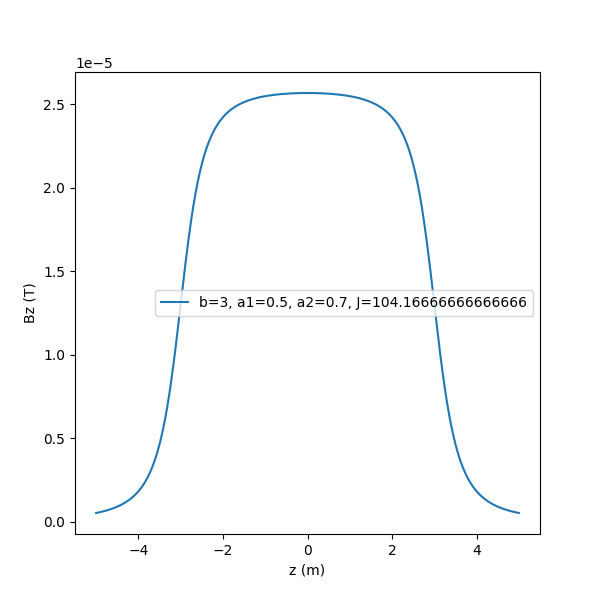

In [38]:
# parameters format: (b, a1, a2, J)
# b = half-height of the solenoid (m)
# a1 = inner radius of the solenoid (m)
# a2 = outer radius of the solenoid (m)
# J = current density (A/m^2)
da = 0.2


b = 3
a = 0.5
I = 1
Nt = 125
J = I * Nt / (da * 2*b)


params = [(b, a, a + da, J)]
fits = []
zp=np.linspace(-5,5,1000) # position of the point of interest (z-axis)


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

for pset in params:
    b, a1, a2, J = pset
    Bz = BiotSavartLaw(J, zp, b, a1, a2)
    ax.plot(zp, Bz, label='b=%s, a1=%s, a2=%s, J=%s' % (b, a1, a2, J))

    # attempt to fit a gaussian to the data
    def gaussian(x, a, x0, sigma):
        return a*np.exp(-(x-x0)**2/(2*sigma**2))
    popt, pcov = curve_fit(gaussian, zp, Bz, p0=[0.0001, 0, 1])
    fits.append(popt)
    #plt.plot(zp, gaussian(zp, *popt), 'r-', label='fit: a=%5.10f, x0=%5.3f, sigma=%5.3f' % tuple(popt))

ax.set_xlabel('z (m)')
ax.set_ylabel('Bz (T)')
ax.legend()
plt.show()

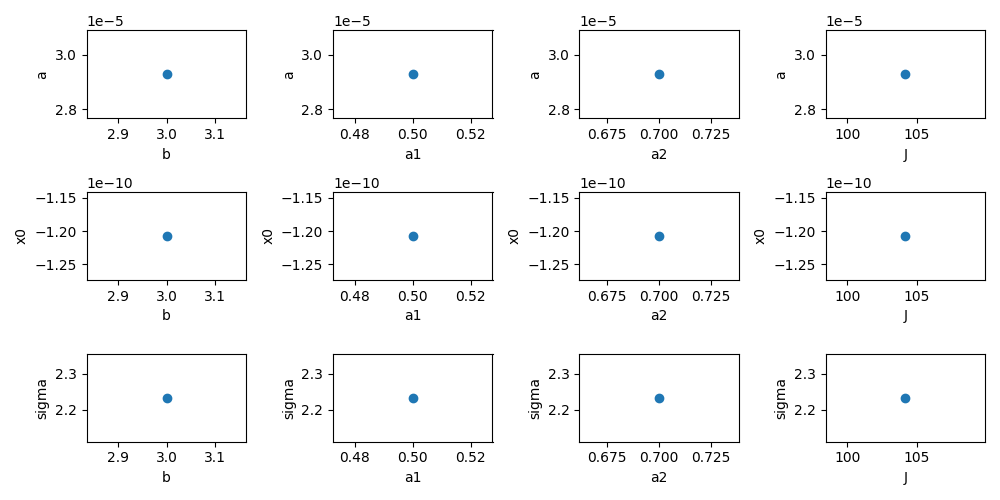

In [39]:
# plot the fit outputs a and sigma as a function of the solenoid parameters
p_labels = ['b', 'a1', 'a2', 'J']; f_labels = ['a', 'x0', 'sigma']

fig, ax = plt.subplots(len(fits[0]),len(params[0]), figsize=(10,5))
for i in range(len(params[0])):
    for j in range(len(fits[0])):
        par = [params[k][i] for k in range(len(params))]
        ax[j][i].plot(par, [fits[k][j] for k in range(len(fits))], 'o-')
        ax[j][i].set_xlabel(p_labels[i])
        ax[j][i].set_ylabel(f_labels[j])
plt.tight_layout()
plt.show()

In [40]:
df = pd.DataFrame([Bz, zp],).T
df.columns = ['Bz', 'zp']
df.to_csv('solenoidMF.csv', index=False)